# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'helse'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

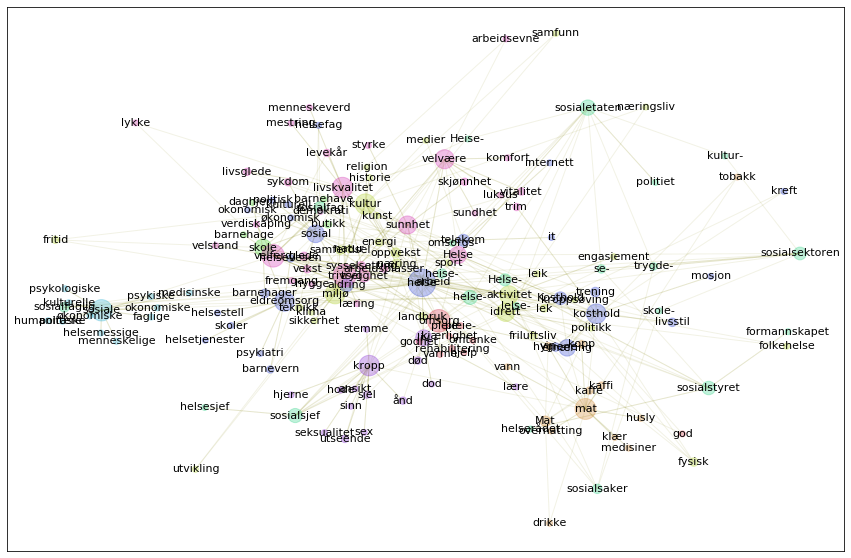

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [17]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>livskvalitet ,hygiene ,sunnhet ,idrett ,vekst ,mat ,trening ,trygghet ,liv ,sosiale ,sport ,velvære ,fritid ,levekår ,kultur ,samfunn ,næring ,fysisk ,skjønnhet ,aldring ,tobakk ,eldreomsorg ,sosial ,natur ,kosthold ,aktivitet ,livsstil ,ernæring ,arbeidsevne ,Helse ,lykke ,glede ,omsorg ,kropp ,næringsliv ,helse- ,barnehager ,samferdsel ,velferd ,helse ,miljø ,skole ,trivsel ,utvikling ,Kosthold ,vitalitet</span>

<span style='font-size:1.1em'>livskvalitet ,helse ,sunnhet ,miljø ,Helse ,trivsel ,trygghet ,aldring ,velferd ,velvære</span>

<span style='font-size:1.1em'>helse ,ernæring ,mat ,trening ,kosthold ,aktivitet</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### kultur-miljø
<span style='font-size:1.1em'>kultur, miljø, aktivitet, idrett, næring, oppvekst, fysisk, samferdsel, teknikk, landbruk, lek, fritid, natur, energi, friluftsliv, engasjement, sikkerhet, sport, religion, leik, samfunn, næringsliv, medier, folkehelse, klima, politikk, kroppsøving, kunst, utvikling, arbeid, historie</span>
### skole-butikk
<span style='font-size:1.1em'>skole, butikk, barnehave, daghjem, barnehage</span>
### sosialetaten-sosialsjef
<span style='font-size:1.1em'>sosialetaten, sosialsjef, helse-, sosialstyret, sosialsektoren, sosialfag, Helse-, sosialsaker, sosialfaglig, heise-, se-, lelse-, trygde-, kultur-, omsorgs-, Heise-, helsesjef, skole-, politiet, formannskapet, helserådet</span>
### sosiale-kulturelle
<span style='font-size:1.1em'>sosiale, kulturelle, helsemessige, menneskelige, politiske, økonomiske, okonomiske, psykologiske, medisinske, psykiske, humanitære, faglige</span>
### helse-eldreomsorg
<span style='font-size:1.1em'>helse, eldreomsorg, kosthold, sosial, ernæring, aldring, Kosthold, telekom, trening, hygiene, livsstil, barnehager, barnevern, helsevesen, skoler, okonomisk, politisk, it, kreft, internett, helsefag, kulturell, helsetjenester, økonomisk, mosjon, psykiatri, helsestell</span>
### kropp-liv
<span style='font-size:1.1em'>kropp, liv, ånd, sjel, død, utseende, hjerne, lære, stemme, sex, ansikt, dod, seksualitet, hode, sinn</span>
### velferd-trivsel
<span style='font-size:1.1em'>velferd, trivsel, livskvalitet, velvære, sunnhet, Helse, trygghet, sysselsetting, glede, vekst, livsglede, levekår, skjønnhet, sykdom, trim, arbeidsplasser, vitalitet, verdiskaping, mestring, menneskeverd, læring, demokrati, styrke, luksus, arbeidsevne, lykke, velstand, hygge, sundhet, komfort, fremgang</span>
### omsorg-rehabilitering
<span style='font-size:1.1em'>omsorg, rehabilitering, god, pleie, pleie-, varme, godhet, omtanke, kjærlighet, hjelp</span>
### mat-Mat
<span style='font-size:1.1em'>mat, Mat, vin, kaffe, kopp, kaffi, medisiner, overnatting, drikke, tobakk, husly, klær, vann</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

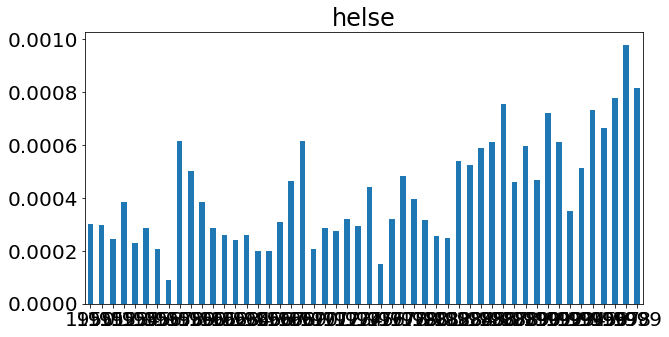

In [20]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.02107075850168864 minutter
1951
0.021313480536142983 minutter
1952
0.023323102792104086 minutter
1953
0.023150873184204102 minutter
1954
0.025521206855773925 minutter
1955
0.027748556931813557 minutter
1956
0.028574534257253013 minutter
1957
0.025604267915089924 minutter
1958
0.02651454210281372 minutter
1959
0.02790273427963257 minutter
1960
0.027790351708730062 minutter
1961
0.03122869332631429 minutter
1962
0.032576453685760495 minutter
1963
0.033711727460225424 minutter
1964
0.030823326110839842 minutter
1965
0.028899804751078288 minutter
1966
0.02877427339553833 minutter
1967
0.027537246545155842 minutter
1968
0.029928608735402425 minutter
1969
0.03031348784764608 minutter
1970
0.0294365127881368 minutter
1971
0.027770296732584635 minutter
1972
0.02978661060333252 minutter
1973
0.02985774278640747 minutter
1974
0.030986122290293374 minutter
1975
0.03033469518025716 minutter
1976
0.03173131942749023 minutter
1977
0.02980746825536092 minutter
1978
0.030116713047027587 minutte

In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [48]:
agg.to_csv('agg_' + filename)

In [26]:
nb.normalize_corpus_dataframe(agg)

True

In [27]:
ref = group_frames(reference)
nb.normalize_corpus_dataframe(ref)

True


# Opptelling

# Sammenligner med en referanse


In [28]:
ref.sort_values(by=ref.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0663397,0.0632207,0.0621348,0.0647454,0.067428
",",0.0403233,0.0416929,0.0356677,0.0371536,0.0367841
i,0.0247726,0.0250452,0.0241426,0.0222206,0.0206715
og,0.0210996,0.0213896,0.0187403,0.0186412,0.0163648
til,0.0116118,0.0113418,0.0108464,0.0103711,0.00896154
er,0.0115398,0.010944,0.0107374,0.0107173,0.0100185
-,0.00541194,0.00706152,0.00962028,0.0122338,0.0178025
som,0.0101848,0.0101861,0.00957867,0.00899728,0.00766517
det,0.0113158,0.0105602,0.00956937,0.00859934,0.00707421
for,0.00928578,0.00940446,0.00923043,0.00847701,0.00735523


In [29]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0597081,0.0602275,0.0596702,0.0590842,0.05718
og,0.0396452,0.0450187,0.0456405,0.0472986,0.0494181
",",0.042128,0.0410497,0.0382607,0.0391128,0.0445184
i,0.0189866,0.0187019,0.0195229,0.021504,0.0219956
for,0.0176106,0.0170277,0.0160634,0.0168432,0.0192971
er,0.0146806,0.0135829,0.0144945,0.015305,0.0148016
til,0.0120081,0.0118579,0.0123203,0.0138693,0.0130209
som,0.0112257,0.011389,0.0122822,0.0112329,0.0103378
av,0.0109996,0.0108555,0.010521,0.0100671,0.00911325
på,0.00938176,0.0110189,0.0100142,0.0104373,0.00992223


In [49]:
pmi = pd.DataFrame()
exp = 1.1
for i in agg:
    pmi[i] = agg[i]**exp/(pd.concat([agg[i], ref[i]],axis=1).sum(axis=1))

In [50]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [51]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
vitnemål,4.48943e-05,3.46921e-05,2.09575e-05,1.22946e-05,8.6117e-06
Søknad,4.44356e-05,3.62689e-05,2.45592e-05,1.39015e-05,9.57428e-06
barnas,4.43088e-05,3.38746e-05,3.06726e-05,1.92039e-05,1.22939e-05
rettkjende,4.36833e-05,3.41377e-05,2.46493e-05,6.49331e-06,2.9827e-06
humør,4.3494e-05,3.52027e-05,3.02545e-05,1.95379e-05,1.26963e-05
dårlig,4.32874e-05,3.58846e-05,3.21947e-05,2.226e-05,1.42119e-05
attest,4.22884e-05,3.61102e-05,2.99108e-05,1.69918e-05,1.07684e-05
God,4.22631e-05,3.54176e-05,3.5393e-05,2.05229e-05,1.19802e-05


In [52]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
vitnemål,4.48943e-05,3.46921e-05,2.09575e-05,1.22946e-05,8.6117e-06
Søknad,4.44356e-05,3.62689e-05,2.45592e-05,1.39015e-05,9.57428e-06
barnas,4.43088e-05,3.38746e-05,3.06726e-05,1.92039e-05,1.22939e-05
rettkjende,4.36833e-05,3.41377e-05,2.46493e-05,6.49331e-06,2.9827e-06
humør,4.3494e-05,3.52027e-05,3.02545e-05,1.95379e-05,1.26963e-05
dårlig,4.32874e-05,3.58846e-05,3.21947e-05,2.226e-05,1.42119e-05
attest,4.22884e-05,3.61102e-05,2.99108e-05,1.69918e-05,1.07684e-05
God,4.22631e-05,3.54176e-05,3.5393e-05,2.05229e-05,1.19802e-05


In [53]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(70).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
opplysning,3.39089e-05,3.84359e-05,3.0338e-05,1.62032e-05,9.88697e-06
forberedt,8.20671e-06,3.78268e-05,2.62727e-05,5.44829e-06,4.09626e-06
helseattest,2.92639e-05,3.72873e-05,2.57106e-05,1.03525e-05,1.14844e-05
fremlegge,3.33672e-05,3.66369e-05,2.60714e-05,1.31555e-05,7.54975e-06
Søknad,4.44356e-05,3.62689e-05,2.45592e-05,1.39015e-05,9.57428e-06
attest,4.22884e-05,3.61102e-05,2.99108e-05,1.69918e-05,1.07684e-05
og,4.19375e-05,3.58851e-05,3.50646e-05,2.53283e-05,1.77787e-05
dårlig,4.32874e-05,3.58846e-05,3.21947e-05,2.226e-05,1.42119e-05


In [54]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
God,4.22631e-05,3.54176e-05,3.5393e-05,2.05229e-05,1.19802e-05
og,4.19375e-05,3.58851e-05,3.50646e-05,2.53283e-05,1.77787e-05
trivsel,4.14131e-05,3.53986e-05,3.4686e-05,2.40419e-05,1.52991e-05
vandel,3.80396e-05,3.49606e-05,3.46708e-05,2.22531e-05,1.31079e-05
sviktende,4.18359e-05,3.57875e-05,3.34519e-05,2.31701e-05,1.46267e-05
psykiske,3.92608e-05,3.32928e-05,3.31411e-05,2.25678e-05,1.47991e-05
fare,4.02801e-05,3.26258e-05,3.24177e-05,2.3164e-05,1.58966e-05
kosthold,4.21396e-05,3.38327e-05,3.23943e-05,2.26008e-05,1.40513e-05


In [55]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
og,4.19375e-05,3.58851e-05,3.50646e-05,2.53283e-05,1.77787e-05
sosial,2.98259e-05,2.16719e-05,2.88091e-05,2.46867e-05,1.76757e-05
veier,1.17816e-05,7.95891e-06,9.70888e-06,2.43936e-05,1.015e-05
trivsel,4.14131e-05,3.53986e-05,3.4686e-05,2.40419e-05,1.52991e-05
Flere,1.38308e-05,7.3848e-06,2.43217e-05,2.36645e-05,7.31794e-06
sosialsektoren,0,2.12289e-05,3.06616e-05,2.36164e-05,1.45967e-05
sosiale,2.92156e-05,1.87252e-05,2.92892e-05,2.3506e-05,1.57691e-05
folks,3.85211e-05,3.15089e-05,3.16019e-05,2.33899e-05,1.52664e-05


In [56]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
og,4.19375e-05,3.58851e-05,3.50646e-05,2.53283e-05,1.77787e-05
miljø,1.92353e-05,2.04592e-05,2.92095e-05,2.30932e-05,1.77563e-05
sosial,2.98259e-05,2.16719e-05,2.88091e-05,2.46867e-05,1.76757e-05
liv,4.84132e-05,3.98855e-05,3.79475e-05,2.66833e-05,1.75861e-05
sikkerhet,3.30759e-05,2.61886e-05,2.7555e-05,2.15345e-05,1.67738e-05
omsorg,3.13599e-05,2.29032e-05,2.50986e-05,2.10816e-05,1.66755e-05
psykisk,3.54002e-05,3.04793e-05,3.21672e-05,2.20424e-05,1.66221e-05
utdanning,3.95282e-05,3.28382e-05,2.9269e-05,2.26177e-05,1.61786e-05
god,5.52304e-05,4.52388e-05,4.05719e-05,2.72326e-05,1.59856e-05
fare,4.02801e-05,3.26258e-05,3.24177e-05,2.3164e-05,1.58966e-05


In [57]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(80).fillna(0).index

Index(['god', 'liv', 'opplysning', 'forberedt', 'helseattest', 'fremlegge',
       'Søknad', 'attest', 'og', 'dårlig', 'sviktende', 'God', 'trivsel',
       'Søkere', 'humør', 'vandel', 'sin', 'gi', 'må', 'vitnemål', 'alder',
       'dråpe', 'sinnets', 'målformer', 'Alder', 'rettkjende', 'velferd',
       'barnas', 'kosthold', 'attestar', 'fysiske', 'avskrifter', 'legeattest',
       'sunnhet', 'Lovfestet', 'psykiske', 'mentale', 'legge', 'hatt',
       'pensjonsordning', 'attestavskrifter', 'utdanning', 'fare', 'behersker',
       'skolestyre', 'hørsel', 'Sokere', 'fysisk', 'innan', 'svekket',
       'framlegge', 'Soknad', 'bevare', 'eldres', 'attester', 'kreves',
       'sendes', 'ugift', 'helse', 'folks', 'offisielle', 'melk', 'Attest',
       'Søknader', 'utskrevne', 'tilfredsstillende', 'anmodning', 'kropp',
       'leggja', 'grunn', 'skulestyre', 'menneskers', 'fysikk', 'humor', 'for',
       'Sinnets', 'være', 'bokmål', 'lege', 'Tollak'],
      dtype='object')

In [58]:
agg.loc[pmi.sort_values(by=pmi.columns[4], ascending=False).head(50).fillna(0).index].style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
og,0.0396452,0.0450187,0.0456405,0.0472986,0.0494181
miljø,1.57264e-05,6.38634e-05,0.000543542,0.00111014,0.00331466
sosial,7.6666e-05,5.50978e-05,0.000353171,0.00153946,0.00285601
liv,0.00363377,0.00382679,0.00437788,0.00412607,0.00386722
sikkerhet,0.000207391,0.000208495,0.000338729,0.000560854,0.00186726
omsorg,7.07686e-05,5.13411e-05,0.000123413,0.000457595,0.00174189
psykisk,0.000143503,0.000246062,0.000788399,0.000623838,0.00165792
utdanning,0.000395125,0.000584788,0.000573083,0.00104716,0.00172013
god,0.0125084,0.0130494,0.00976341,0.00673411,0.0032411
fare,0.00087871,0.000792657,0.00108512,0.00107072,0.001283


In [59]:
ordliste = 'liv kropp hygiene ernæring idrett arbeidsmiljø livskvalitet risiko omsorg velvære utdanning tjenester og sosial fysisk psykisk syk sykdom sikkerhet'.split()
ord_art = pmi.loc[ordliste]

In [60]:
ordliste 

['liv',
 'kropp',
 'hygiene',
 'ernæring',
 'idrett',
 'arbeidsmiljø',
 'livskvalitet',
 'risiko',
 'omsorg',
 'velvære',
 'utdanning',
 'tjenester',
 'og',
 'sosial',
 'fysisk',
 'psykisk',
 'syk',
 'sykdom',
 'sikkerhet']

In [61]:
pmil = (agg.loc[ordliste]/ref.loc[ordliste]).apply(round)


In [62]:
pmil['translation'] = ['life',
 'body',
 'hygiene',
 'nutrition',
 'sport',
 'work environment',
 'quality of life',
 'risk',
 'caring',
 'wellness',
 'education',
 'services',
 'and',
 'social',
 'physical',
 'psychic',
 'sick',
 'disease',
 'safety']

In [63]:
pmil.fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
liv,22,27,32,27,23,life
kropp,45,57,29,78,81,body
hygiene,88,42,59,77,41,hygiene
ernæring,54,83,118,87,180,nutrition
idrett,9,10,5,15,20,sport
arbeidsmiljø,0,28,19,22,24,work environment
livskvalitet,0,0,89,76,74,quality of life
risiko,6,10,14,10,10,risk
omsorg,11,6,11,19,64,caring
velvære,60,63,107,90,136,wellness


In [64]:
agg.loc[ordliste].style.bar(axis=1)

,1950,1960,1970,1980,1990
liv,0.00363377,0.00382679,0.00437788,0.00412607,0.00386722
kropp,0.000184785,0.000276115,0.000126039,0.000669255,0.000980466
hygiene,0.000216237,0.000140875,0.00015164,0.000125967,8.91763e-05
ernæring,6.38883e-05,0.000128353,0.000326913,0.000336341,0.000278646
idrett,0.000141537,0.000134614,0.00011094,0.000314061,0.000386036
arbeidsmiljø,0,1.75311e-05,0.000105032,0.000222799,0.000226607
livskvalitet,0,0,1.50984e-05,9.76889e-05,0.000191126
risiko,5.20936e-05,7.38811e-05,0.000111597,8.69774e-05,9.24879e-05
omsorg,7.07686e-05,5.13411e-05,0.000123413,0.000457595,0.00174189
velvære,0.000222135,0.00017719,0.000177242,0.000195378,0.000268002


In [46]:
pmi.to_csv(filename)

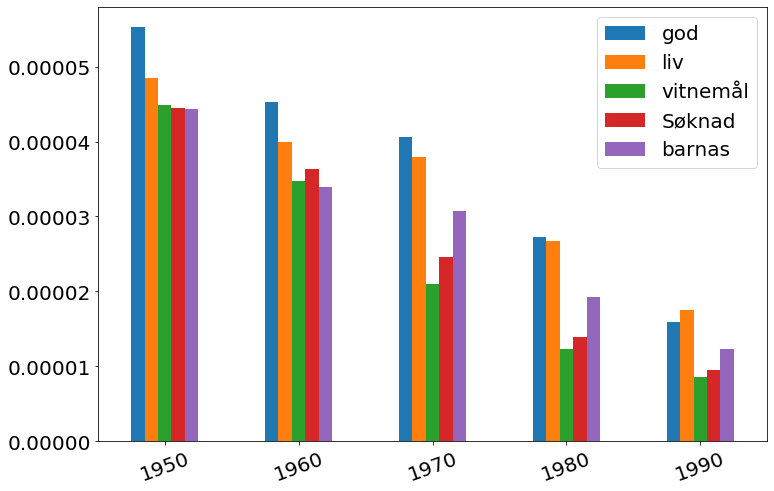

In [65]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [66]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

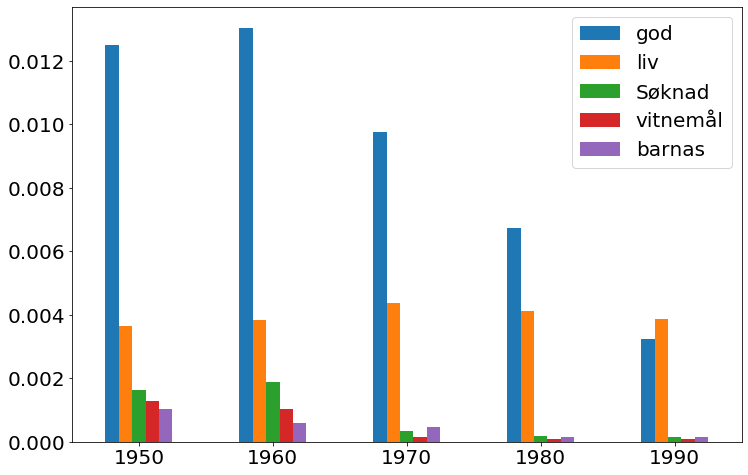

In [67]:
freq_assoc_val(agg, pmi, 0)

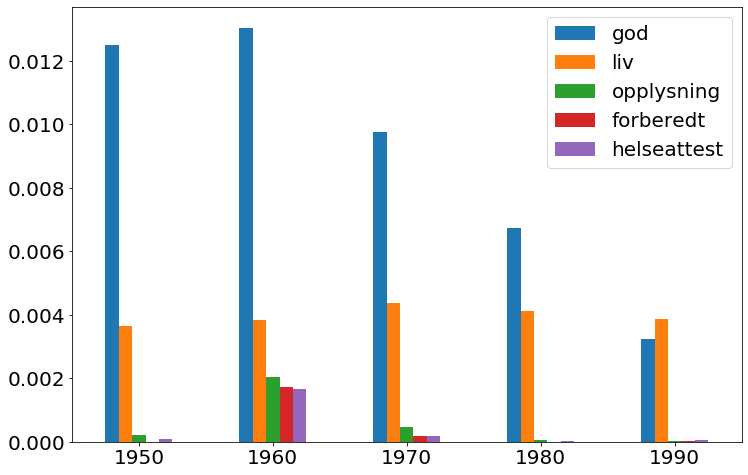

In [68]:
freq_assoc_val(agg, pmi, 1)

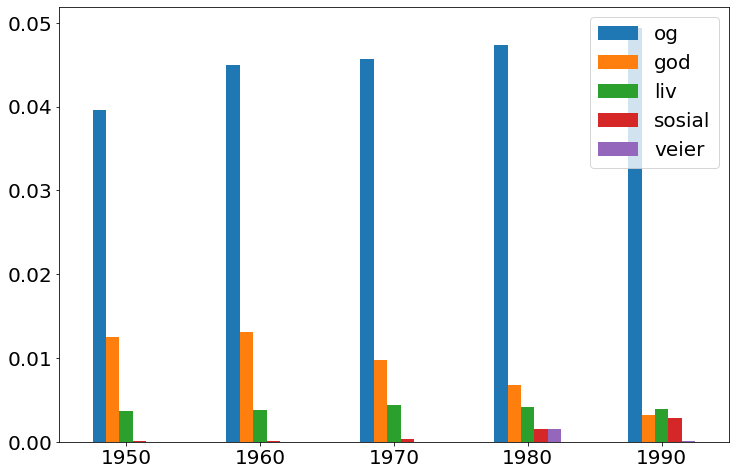

In [69]:
freq_assoc_val(agg, pmi, 3)

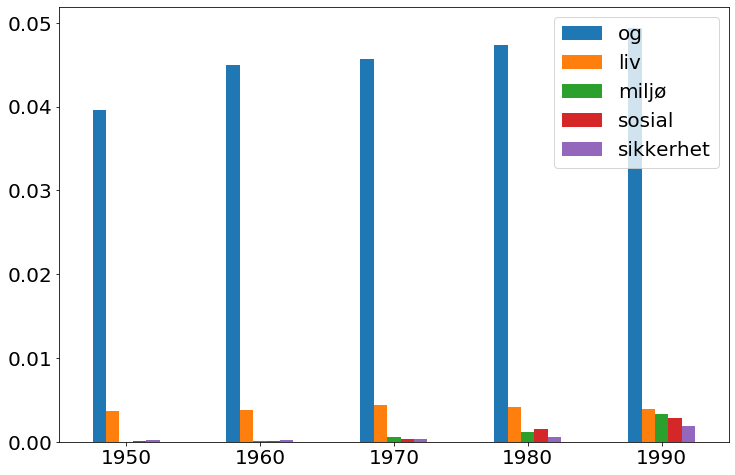

In [70]:
freq_assoc_val(agg, pmi, 4)

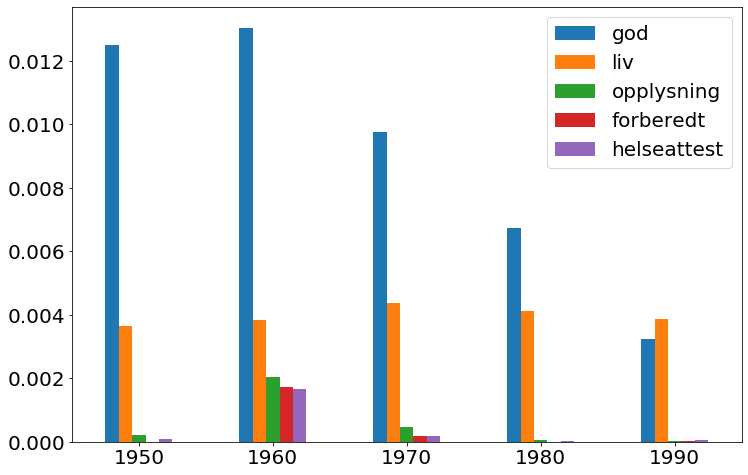

In [77]:
freq_assoc_val(agg, pmi, 1)

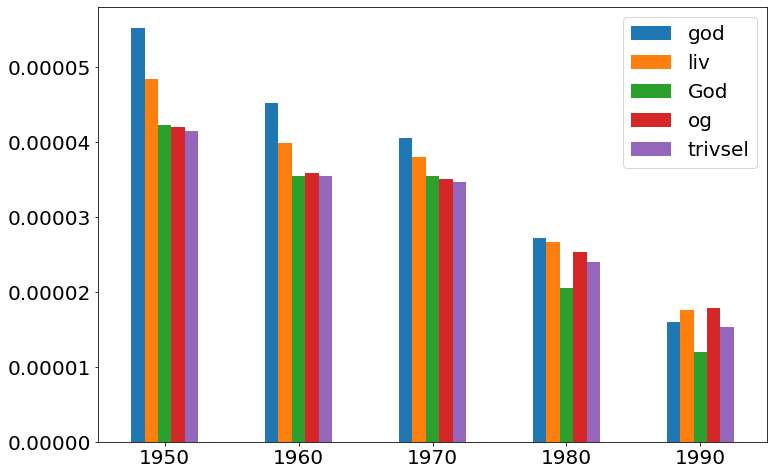

In [72]:
freq_assoc_val(pmi, pmi, 2)

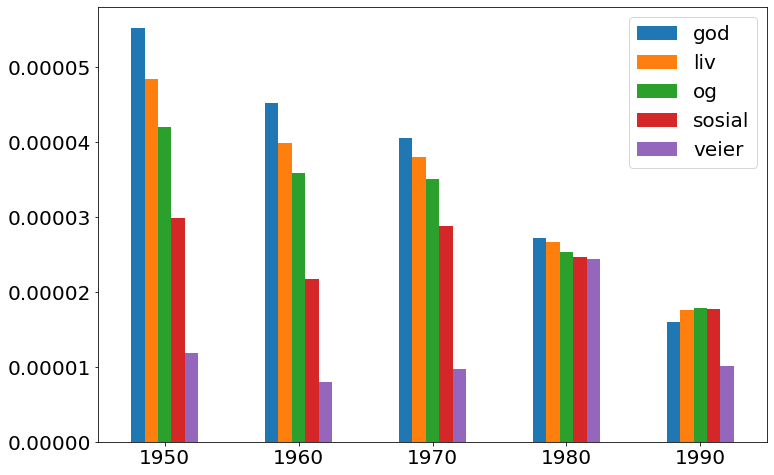

In [73]:
freq_assoc_val(pmi, pmi, 3)

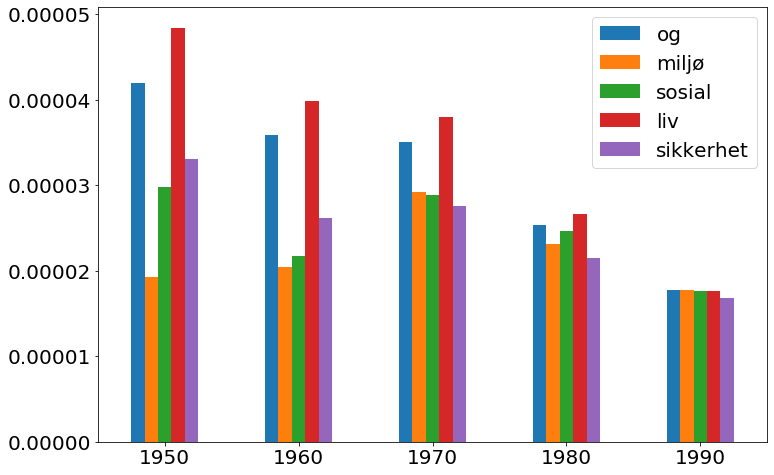

In [74]:
freq_assoc_val(pmi, pmi, 4)

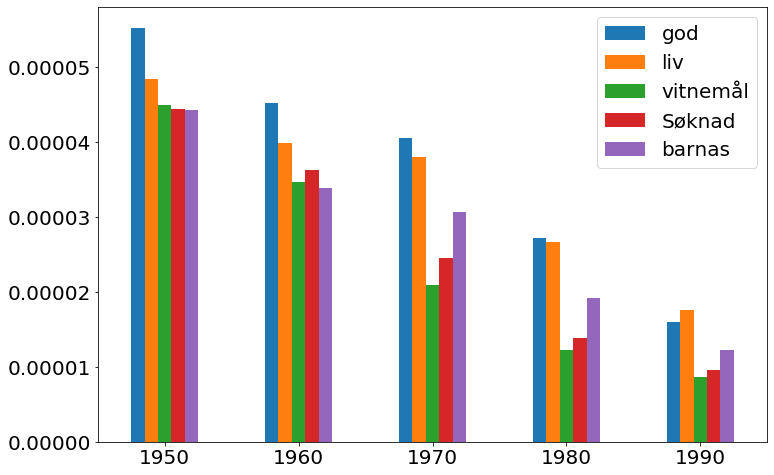

In [75]:
freq_assoc_val(pmi, pmi, 0)

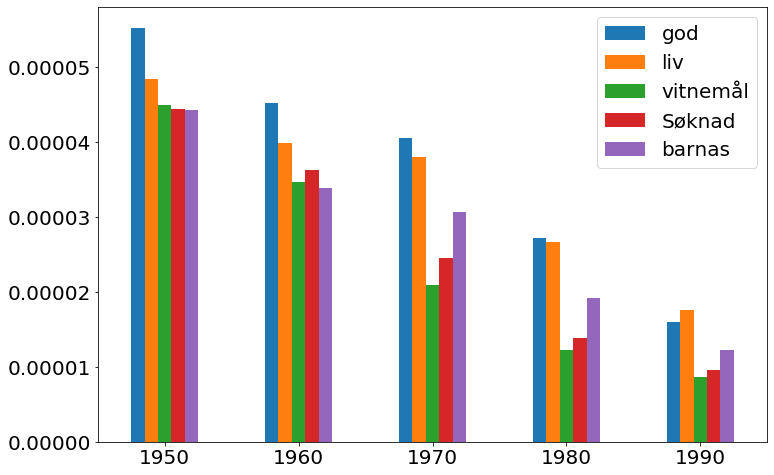

In [76]:
freq_assoc_val(pmi, pmi, 0)

In [ ]:
freq_assoc_val(pmi, pmi, 0)

In [ ]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [ ]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [ ]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

# Hvordan utvikler ordene seg?

In [ ]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

In [ ]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

In [ ]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

In [ ]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

In [ ]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [ ]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

In [ ]:
commchart(2, (0,5));

In [ ]:
commchart(1, (3, 8))

In [ ]:
commchart(3)